In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import torch

from dataset import LamaHDataset
from torch_geometric.utils import to_networkx

In [3]:
df = pd.read_csv("LamaH-CE/processed/adjacency.csv")

In [4]:
def longest_path(start_id):
    predecessors = list(df[df["NEXTDOWNID"] == start_id]["ID"])
    if not predecessors:
        return 0
    else:
        return 1 + max(longest_path(pre) for pre in predecessors)

In [5]:
print(max(longest_path(i) for i in range(900)))

19


In [10]:
dataset = LamaHDataset("LamaH-CE", years=[2000])

Loading dataset into memory...


100%|██████████| 375/375 [00:16<00:00, 22.16it/s]


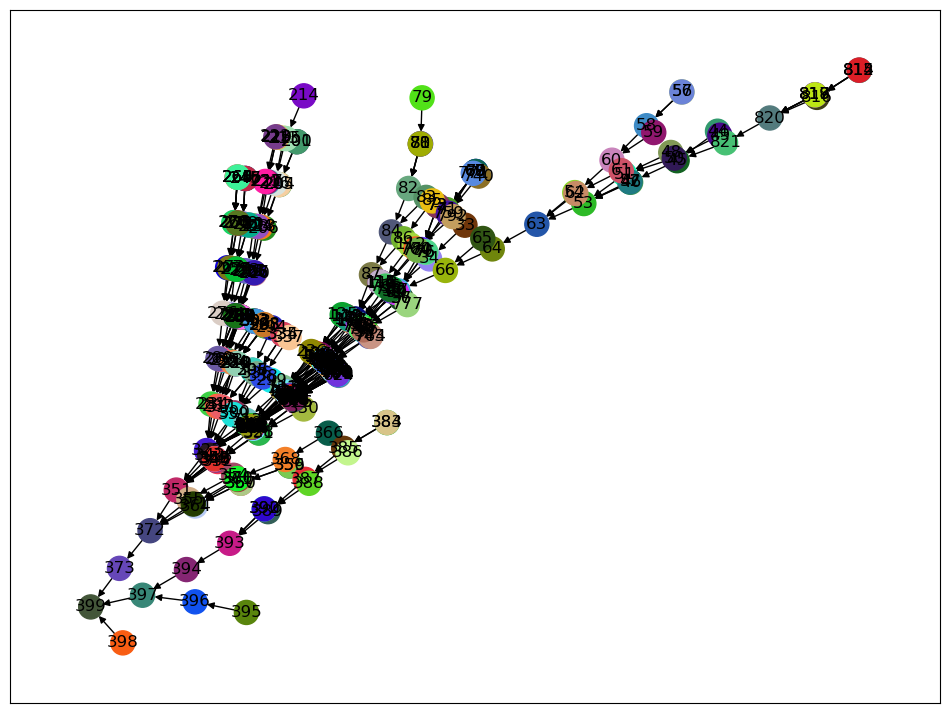

In [12]:
data = dataset[0]
plt.figure(figsize=(12, 9))
graph = nx.relabel_nodes(to_networkx(data, to_undirected=False), dict(enumerate(dataset.gauges)))
nx.draw_networkx(graph, pos=nx.drawing.kamada_kawai_layout(graph), with_labels=True,
                 node_color=[tuple(torch.rand(3)) for _ in range(375)])